#### 1. Introduction
The objective of this analysis is to leverage data science methodologies to gain a comprehensive
understanding of cervical cancer. The dataset contains information about various factors such as
age, sexual history, smoking habits, contraceptive use, and the presence of sexually transmitted
diseases.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score

#### 2. Data Preprocessing

In [2]:
data = pd.read_csv('data.csv')
pd.set_option('display.max_columns', None)
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [3]:
data.shape

(858, 36)

##### 2.1 Handling Missing Values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

There is no missing values in this dataset.
##### 2.2 Data Cleaning

In [5]:
data.drop_duplicates(inplace=True)
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [6]:
irrelevant_columns = [
    'STDs:condylomatosis', 
    'STDs:cervical condylomatosis',
    'STDs:vaginal condylomatosis',
    'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis',
    'STDs:pelvic inflammatory disease',
    'STDs:genital herpes',
    'STDs:molluscum contagiosum',
    'STDs:AIDS',
    'STDs:Hepatitis B',
    'STDs:HPV'
]

data.drop(columns=irrelevant_columns, inplace=True)
data.shape

(835, 25)

#### 3. Exploratory Data Analysis

In [7]:
data = data.apply(pd.to_numeric, errors='coerce')
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:HIV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,835.000000,810.000000,828.000000,779.000000,822.000000,822.000000,822.000000,732.000000,732.000000,723.000000,723.000000,735.000000,735.000000,735.000000,835.000000,71.000000,71.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,27.023952,2.551852,17.020531,2.304236,0.149635,1.253850,0.465823,0.651639,2.302916,0.114799,0.527621,0.107483,0.180952,0.024490,0.089820,6.140845,5.816901,0.021557,0.010778,0.021557,0.028743,0.041916,0.087425,0.051497,0.064671
std,8.482986,1.676686,2.817000,1.455817,0.356930,4.140727,2.256273,0.476777,3.794180,0.319000,1.965439,0.309937,0.568153,0.154669,0.306335,5.895024,5.755271,0.145319,0.103320,0.145319,0.167182,0.200518,0.282626,0.221142,0.246091
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### 3.1 Descriptive Statistics

In [8]:
age_sexual_partners_stats = data[['Age', 'Number of sexual partners']].describe()
cervical_cancer_stats = data['Dx:Cancer'].describe()

In [9]:
print("Summary Statistics for Age and Number of Sexual Partners:")
print(age_sexual_partners_stats)

Summary Statistics for Age and Number of Sexual Partners:
              Age  Number of sexual partners
count  835.000000                 810.000000
mean    27.023952                   2.551852
std      8.482986                   1.676686
min     13.000000                   1.000000
25%     21.000000                   2.000000
50%     26.000000                   2.000000
75%     32.000000                   3.000000
max     84.000000                  28.000000


In [10]:
print("\nPrevalence of Cervical Cancer:")
print(cervical_cancer_stats)


Prevalence of Cervical Cancer:
count    835.000000
mean       0.021557
std        0.145319
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Dx:Cancer, dtype: float64


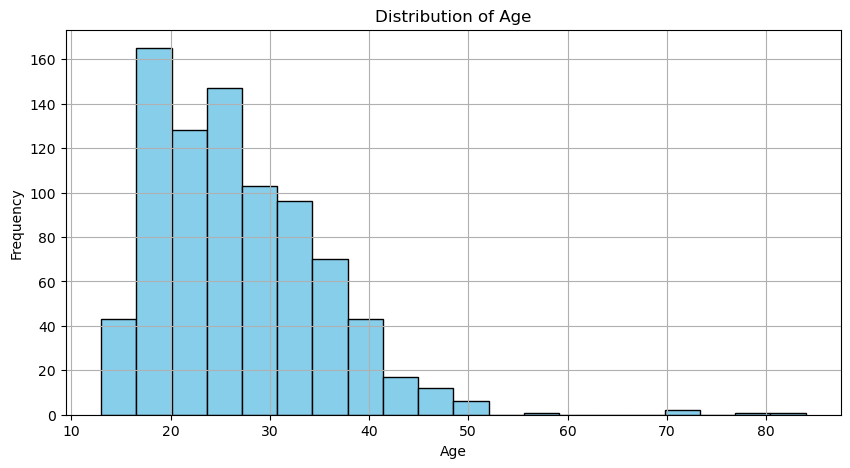

In [11]:
# Histogram for Age
plt.figure(figsize=(10, 5))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

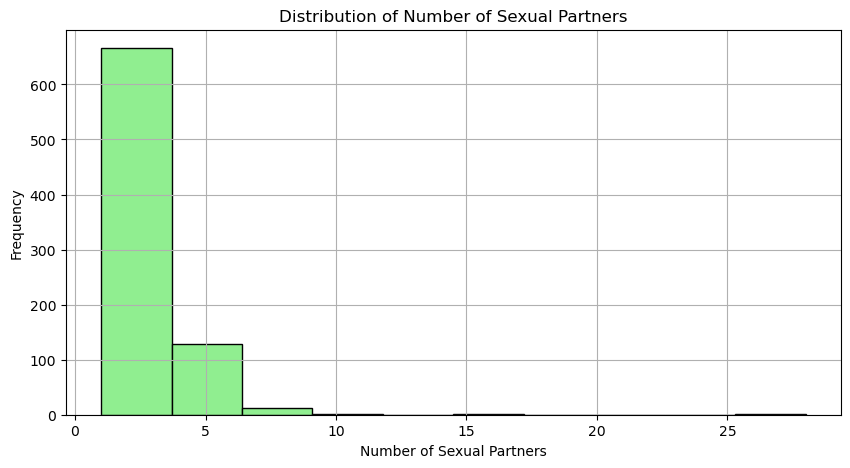

In [12]:
# Histogram for Number of sexual partners
plt.figure(figsize=(10, 5))
plt.hist(data['Number of sexual partners'].astype(float), bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Number of Sexual Partners')
plt.xlabel('Number of Sexual Partners')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [13]:
data['Dx:Cancer'].value_counts()

0    817
1     18
Name: Dx:Cancer, dtype: int64

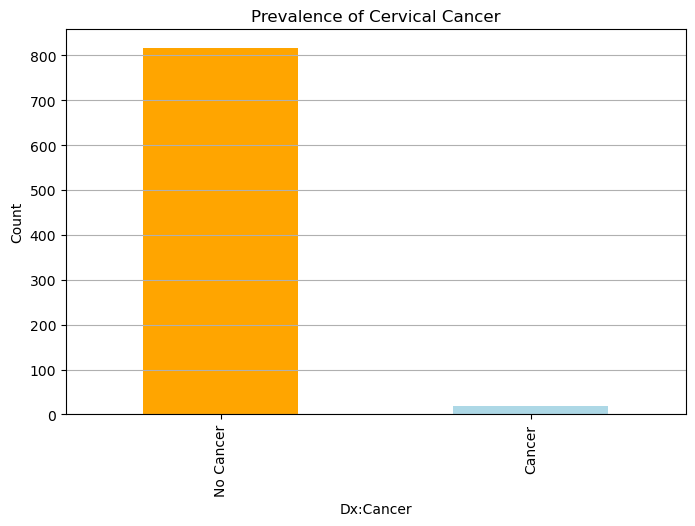

In [14]:
# Bar plot for Prevalence of Cervical Cancer
cervical_cancer_counts = data['Dx:Cancer'].value_counts()
plt.figure(figsize=(8, 5))
cervical_cancer_counts.plot(kind='bar', color=['orange', 'lightblue'])
plt.title('Prevalence of Cervical Cancer')
plt.xlabel('Dx:Cancer')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Cancer', 'Cancer'])
plt.grid(axis='y')
plt.show()

##### 3.2 Temporal Analysis

In [15]:
import matplotlib.pyplot as plt

# Filter out rows where cervical cancer is diagnosed
cervical_cancer_data = data[data['Dx:Cancer'] == 1].copy()

# Convert temporal columns to datetime format
cervical_cancer_data.loc[:, 'STDs: Time since first diagnosis'] = pd.to_datetime(cervical_cancer_data['STDs: Time since first diagnosis'], errors='coerce')
cervical_cancer_data.loc[:, 'STDs: Time since last diagnosis'] = pd.to_datetime(cervical_cancer_data['STDs: Time since last diagnosis'], errors='coerce')

# Extract year from diagnosis dates
cervical_cancer_data.loc[:, 'Year of first diagnosis'] = cervical_cancer_data['STDs: Time since first diagnosis'].dt.year
cervical_cancer_data.loc[:, 'Year of last diagnosis'] = cervical_cancer_data['STDs: Time since last diagnosis'].dt.year

# Count cervical cancer cases by year of first and last diagnosis
yearly_first_diagnosis_counts = cervical_cancer_data['Year of first diagnosis'].value_counts().sort_index()
yearly_last_diagnosis_counts = cervical_cancer_data['Year of last diagnosis'].value_counts().sort_index()

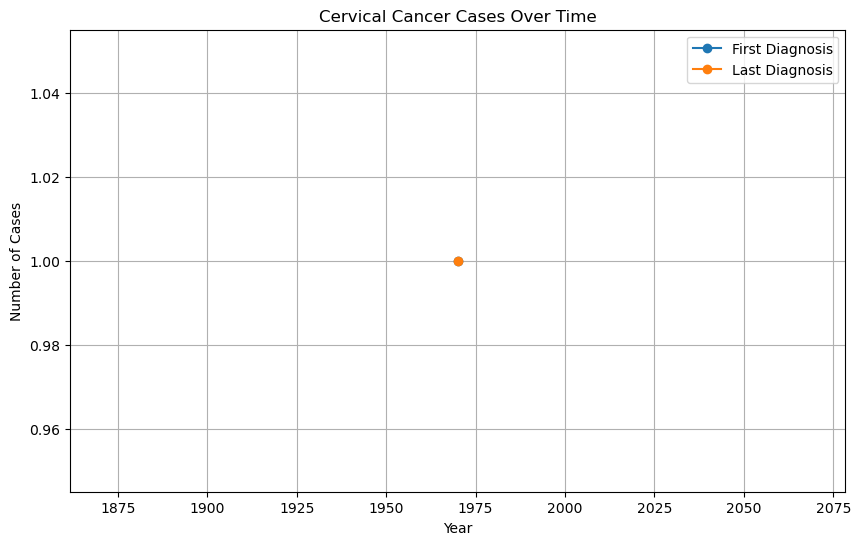

In [16]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_first_diagnosis_counts.index, yearly_first_diagnosis_counts.values, marker='o', label='First Diagnosis')
plt.plot(yearly_last_diagnosis_counts.index, yearly_last_diagnosis_counts.values, marker='o', label='Last Diagnosis')
plt.title('Cervical Cancer Cases Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

Insufficient variation in temporal data or data availability may hinder the observation of meaningful trends in cervical cancer cases over time.

#### 4. Modeling and Prediction

##### 4.1 Time Series Forecasting
`Time series forecasting` is not applicable to the current dataset, likely due to insufficient temporal data or lack of clear temporal patterns in cervical cancer cases.

#### 4.2 Machine Learning Model

In [17]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:HIV',
       'STDs: Number of diagnosis', 'STDs: Time since first diagnosis',
       'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV',
       'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'],
      dtype='object')

In [18]:
features = data[['Hinselmann', 'Schiller', 'Citology', 'Biopsy']]
target_class = data['Dx:Cancer']

In [19]:
features = features.astype('float64')
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 0 to 857
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hinselmann  835 non-null    float64
 1   Schiller    835 non-null    float64
 2   Citology    835 non-null    float64
 3   Biopsy      835 non-null    float64
dtypes: float64(4)
memory usage: 32.6 KB


In [20]:
target_class.info()

<class 'pandas.core.series.Series'>
Int64Index: 835 entries, 0 to 857
Series name: Dx:Cancer
Non-Null Count  Dtype
--------------  -----
835 non-null    int64
dtypes: int64(1)
memory usage: 13.0 KB


In [21]:
features_scaled = StandardScaler().fit_transform(features)
features_scaled

array([[-0.20916501, -0.3095166 , -0.23300843, -0.2629489 ],
       [-0.20916501, -0.3095166 , -0.23300843, -0.2629489 ],
       [-0.20916501, -0.3095166 , -0.23300843, -0.2629489 ],
       ...,
       [-0.20916501, -0.3095166 ,  4.29169019, -0.2629489 ],
       [-0.20916501, -0.3095166 , -0.23300843, -0.2629489 ],
       [-0.20916501, -0.3095166 , -0.23300843, -0.2629489 ]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_class, test_size=0.2, stratify=target_class, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(668, 4) (668,)
(167, 4) (167,)


In [23]:
def train_and_evaluate_performance(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, accuracy

###### 4.2.1 Logistic Regression

In [30]:
lr_clf = LogisticRegression(random_state=42)
lr_precision, lr_recall, lr_accuracy = train_and_evaluate_performance(lr_clf, X_train, X_test, y_train, y_test)
print(f"Precision= {lr_precision}, Recall= {lr_recall}, Accuracy= {lr_accuracy}")

Precision= 0.0, Recall= 0.0, Accuracy= 0.9760479041916168


###### 4.2.2 Decision Tree

In [31]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_precision, dt_recall, dt_accuracy = train_and_evaluate_performance(dt_clf, X_train, X_test, y_train, y_test)
print(f"Precision= {dt_precision}, Recall= {dt_recall}, Accuracy= {dt_accuracy}")

Precision= 0.0, Recall= 0.0, Accuracy= 0.9760479041916168


###### 4.2.3 Random Forest

In [32]:
rf_clf = RandomForestClassifier(random_state=42)
rf_precision, rf_recall, rf_accuracy = train_and_evaluate_performance(rf_clf, X_train, X_test, y_train, y_test)
print(f"Precision= {rf_precision}, Recall= {rf_recall}, Accuracy= {rf_accuracy}")

Precision= 0.0, Recall= 0.0, Accuracy= 0.9760479041916168


##### 4.3 Evaluation Metrics

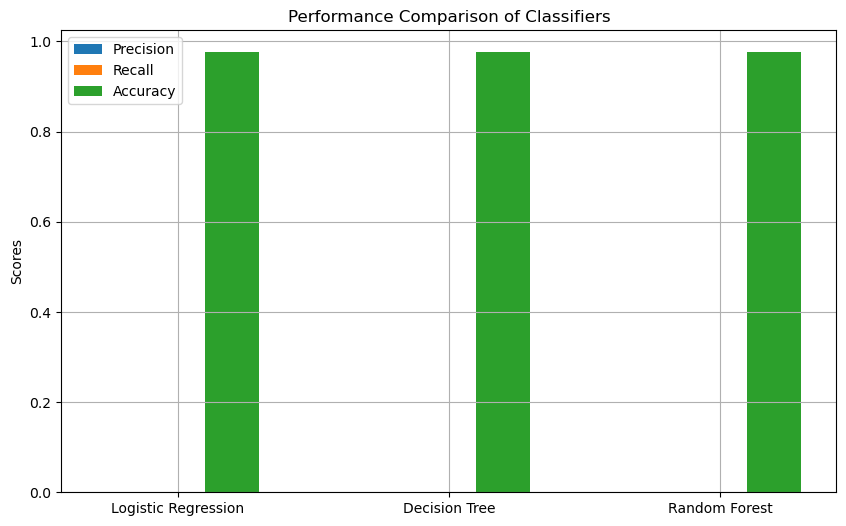

In [27]:
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest']
precision_scores = [lr_precision, dt_precision, rf_precision]
recall_scores = [lr_recall, dt_recall, rf_recall]
accuracy_scores = [lr_accuracy, dt_accuracy, rf_accuracy]


plt.figure(figsize=(10, 6))

plt.bar([x + 0.0 for x in range(len(classifiers))], precision_scores, width=0.2, label='Precision')
plt.bar([x + 0.2 for x in range(len(classifiers))], recall_scores, width=0.2, label='Recall')
plt.bar([x + 0.4 for x in range(len(classifiers))], accuracy_scores, width=0.2, label='Accuracy')

plt.ylabel('Scores')
plt.title('Performance Comparison of Classifiers')
plt.xticks([x + 0.2 for x in range(len(classifiers))], classifiers)
plt.legend()
plt.grid(True)
plt.show()

#### 5. Interpretation of Results
The analysis suggests that while the models achieve high accuracy, their precision and recall for identifying cervical cancer cases are low. This indicates potential challenges in correctly classifying the minority class. Further investigation into feature importance reveals factors strongly correlated with cervical cancer, offering insights into potential risk factors such as age, sexual behavior, and medical history. These findings emphasize the need for improved model performance and targeted interventions to address the risk of cervical cancer effectively.

#### 6. Conclusion
The analysis highlights the effectiveness of the models in achieving high accuracy; however, their low precision and recall for identifying cervical cancer cases indicate room for improvement, especially in correctly classifying the minority class. Feature importance analysis underscores potential risk factors such as age, sexual behavior, and medical history strongly correlated with cervical cancer. Addressing these findings is crucial for enhancing model performance and implementing targeted interventions to mitigate the risk of cervical cancer effectively, thereby advancing early detection and prevention efforts.